<a href="https://colab.research.google.com/github/WatermelonGalaxy/deep-learning-colabs/blob/main/ADL_hw_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

d = 5000

#images of fashion items

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-d], y_train_full[:-d]
X_valid, y_valid = X_train_full[-d:], y_train_full[-d:]

print(X_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
(55000, 28, 28)


In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(len(class_names))

for i in range(5):
  print(class_names[y_train[i]])

10
Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top


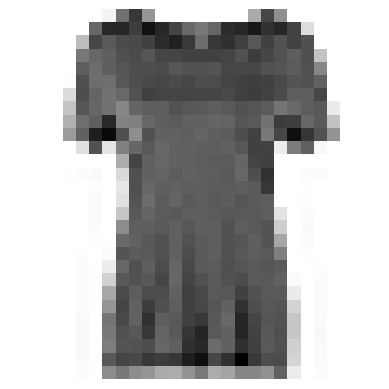

T-shirt/top


In [5]:
import matplotlib.pyplot as plt

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

i = 10 #try different values here!
plt.imshow(X_train[i], cmap="binary")
plt.axis('off')
plt.show()
print(class_names[y_train[i]])

Create a model. Set:

- final layer
- loss
- optimizer
- metrics

See sample code at the bottom for:
- accuracy on X_test/y_test
- plot of train history


In [39]:
# model goes here
tf.keras.backend.clear_session()
tf.random.set_seed(42)


#For now you will need the following as your first layer:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(400, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
    
    #No Convolution is allowed.




In [40]:
number_of_epochs = 8 #change this!

model.compile(loss="sparse_categorical_crossentropy",
                optimizer="RMSprop",
                metrics=["accuracy"])


history = model.fit(X_train, y_train, epochs=number_of_epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/8
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9845 - accuracy: 0.6221 - val_loss: 0.7220 - val_accuracy: 0.7136
Epoch 2/8
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5900 - accuracy: 0.7829 - val_loss: 0.5214 - val_accuracy: 0.8084
Epoch 3/8
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4914 - accuracy: 0.8217 - val_loss: 0.4776 - val_accuracy: 0.8264
Epoch 4/8
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4409 - accuracy: 0.8390 - val_loss: 0.4115 - val_accuracy: 0.8464
Epoch 5/8
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4060 - accuracy: 0.8521 - val_loss: 0.3834 - val_accuracy: 0.8570
Epoch 6/8
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3819 - accuracy: 0.8600 - val_loss: 0.3917 - val_accuracy: 0.8568
Epoch 7/8
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3652 - accuracy: 0.8660 - val_loss: 0.3676 - val_accuracy: 0.8658

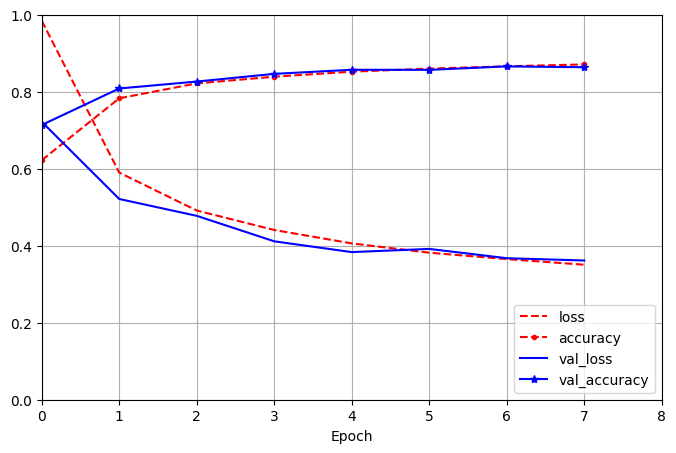

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, number_of_epochs], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower right")
plt.show()

In [ ]:
model.evaluate(X_test, y_test)